## Estatística Aplicada - Métodos Quantitativos
### Otimização de processos
Script para simplificar a resolução de problemas de otimização, sejam eles de maximização ou minimização. Para o uso do script, basta seguir o preenchimento e alteração dos valores conforme exemplo indicado.

#### Exemplo:
Suponha uma empresa de logística que produz e exporta suco. Essa empresa gostaria de otimizar seus custos (ou seja, minimizar) a partir da existência de 3 fábricas produtoras e cinco mercados/destinos, sendo que o objetivo é escoar toda a produção com o menor custo possível.
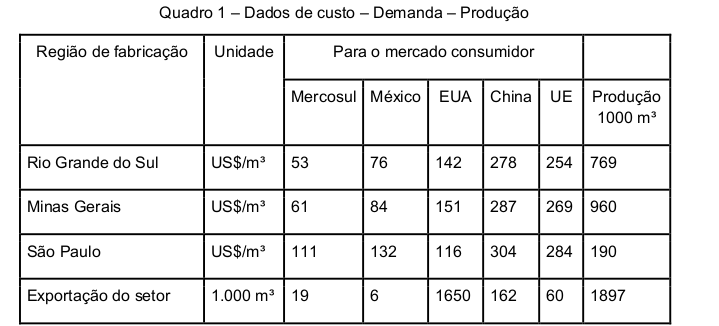
Sendo assim, pode-se considerar cada variável $x_ij$ como sendo a combinação da região $i$ com o mercado $j$. Dessa maneira pode-se obter a seguinte função objetivo:
> FO = 53*x_11 + 76*x_12 + 142*x_13 + 278*x_14 + 254*x_15 + 61*x_21 + 84*x_22 + 151*x_23 + 287*x_24 + 269*x_25 + 111*x_31 + 132*x_32 + 116*x_33 + 304*x_34 + 284*x_3_5

Para as restrições tem-se que toda a produção deve ser escoada e toda a demanda deve ser atendida, além da restrição de não negatividade para cada $x_ij$, ou seja:
> x_11 + x_12 + x_13 + x_14 + x_15 = 769 (produção no RS)<br>
x_21 + x_22 + x_23 + x_24 + x_25 = 960 (produção em MG)<br>
x_31 + x_32 + x_33 + x_34 + x_35 = 190 (produção em SP)<br>

>x_11 + x_21 + x_31 = 19 (demanda no Mercosul)<br>
x_12 + x_22 + x_32 = 6 (demanda no México)<br>
x_13 + x_23 + x_33 = 1650 (demanda nos EUA)<br>
x_14 + x_24 + x_34 = 162 (demanda na China)<br>
x_15 + x_25 + x_35 = 60 (demanda na UE)<br>
x_ij >= 0

Para o exemplo acima as entradas no script serão:
+ funcObjetivo = [53, 76, 142, 278, 254, 61, 84, 151, 287, 269, 111, 132, 116, 304, 284]

As restrições considerando todas as variáveis x_ij serão:
+ produção RS [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] = [769]
+ produção MG [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0] = [960]
+ produção SP [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1] = [190]

E as restrições para demanda serão: 
+ demanda Mercosul [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0] = [19] 
+ demanda Mexico   [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0] = [6]
+ demanda EUA      [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0] = [1650]
+ demanda China    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0] = [162]
+ demanda UE       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1] = [60]

In [1]:
from scipy.optimize import linprog
import numpy as np
from datetime import datetime

start = datetime.now()

In [2]:
# Definindo a função objetivo:
funcObjetivo = [53, 76, 142, 278, 254, 61, 84, 151, 287, 269, 111, 132, 116, 304, 284]

# Definindo as restrições de igualdade:
restricoesFx = [[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], 
                [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 
                [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]]

restricoesY = [769, 960, 190, 19, 6, 1650, 162, 60]

# Definindo as restrições de desigualdade ou, para esse caso, limites de x_ij:
restricoesLimite = [(0, float('inf')) for n in range(15)]

In [3]:
# Como a função apenas miminiza e a função deve ser otimizada, todos os valores devem ter o sinal invertido.
# Além disso, para inequações utiliza-se os parâmetros A_ub <= b_ub, 
# enquanto que para equações utiliza-se A_eq = b_eq.

funcObjetivo = [-1*item for item in funcObjetivo]

opt = linprog(c=funcObjetivo, A_eq=restricoesFx, b_eq=restricoesY, 
              method = 'revised simplex', bounds=restricoesLimite, options={'rr':False})

print('Restrições: ', opt.con, '\nValor máximo: ', opt.fun*(-1), '\nFunção máxima: ', opt.x)

Restrições:  [ 0.  0. 22.  0.  0.  0.  0.  0.] 
Valor máximo:  302399.0 
Função máxima:  [  0.   0. 547. 162.  60.   0.   0. 960.   0.   0.  19.   6. 143.   0.
   0.]


/tmp/ipykernel_90793/3300510725.py:7: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=funcObjetivo, A_eq=restricoesFx, b_eq=restricoesY,


In [4]:
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

In [5]:
# Definir o tipo de problema como maximo ou minimo:
tipoBusca = 'minimo'

# Criando o modelo para receber os parâmetros:
model = LpProblem(name="otimizacao", sense=(LpMaximize if tipoBusca == 'maximo' else LpMinimize))

# Iniciando as variáveis já com xij >= 0:
x11 = LpVariable(name="x11", lowBound=0)
x12 = LpVariable(name="x12", lowBound=0)
x13 = LpVariable(name="x13", lowBound=0)
x14 = LpVariable(name="x14", lowBound=0)
x15 = LpVariable(name="x15", lowBound=0)
x21 = LpVariable(name="x21", lowBound=0)
x22 = LpVariable(name="x22", lowBound=0)
x23 = LpVariable(name="x23", lowBound=0)
x24 = LpVariable(name="x24", lowBound=0)
x25 = LpVariable(name="x25", lowBound=0)
x31 = LpVariable(name="x31", lowBound=0)
x32 = LpVariable(name="x32", lowBound=0)
x33 = LpVariable(name="x33", lowBound=0)
x34 = LpVariable(name="x34", lowBound=0)
x35 = LpVariable(name="x35", lowBound=0)

# Definindo a função objetivo e adicionando ao modelo:
model += 53*x11 + 76*x12 + 142*x13 + 278*x14 + 254*x15 + 61*x21 + 84*x22 + 151*x23 + 287*x24 + 269*x25 + 111*x31 + 132*x32 + 116*x33 + 304*x34 + 284*x35

# Definindo as restrições e adicionando ao modelo:
model += (x11 + x12 + x13 + x14 + x15 == 769, 'produção RS')
model += (x21 + x22 + x23 + x24 + x25 == 960, 'produção MG')
model += (x31 + x32 + x33 + x34 + x35 == 190, 'produção SP')
model += (x11 + x21 + x31 == 19, 'demanda Mercosul')
model += (x12 + x22 + x32 == 6, 'demanda México')
model += (x13 + x23 + x33 == 1650, 'demanda EUA')
model += (x14 + x24 + x34 == 162, 'demanda China')
model += (x15 + x25 + x35 == 60, 'demanda UE')

# Resolvendo o problema:
solucao = model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/michelrribeiro/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/522cfa235d304999b9ff416f3104eee6-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/522cfa235d304999b9ff416f3104eee6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 59 RHS
At line 68 BOUNDS
At line 69 ENDATA
Problem MODEL has 8 rows, 15 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 8 (0) rows, 15 (0) columns and 30 (0) elements
0  Obj 0 Primal inf 3816 (8)
7  Obj 301364 Primal inf 22 (1)
Primal infeasible - objective value 301364
PrimalInfeasible objective 301364 - 7 iterations time 0.002

Result - Linear relaxation infeasible

Enumerated nodes:           0
Total iterations:           0
Time (CPU seconds):         0.00
Time (Wallclock Seconds):   0.00

Option fo

In [6]:
valores = []
variaveis = []


print(f"status: {model.status}, {LpStatus[model.status]}")

print(f"objective: {model.objective.value()}")

print('\nValores residuais:')
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

finalSolver = ' + '.join([str(int(n.value()))+n.name for n in model.variables() if n.value() > 0])
    
print('Equação final: ',finalSolver)

status: -1, Infeasible
objective: 301364.0

Valores residuais:
produção_RS: 0.0
produção_MG: 0.0
produção_SP: 0.0
demanda_Mercosul: 0.0
demanda_México: 22.0
demanda_EUA: 0.0
demanda_China: 0.0
demanda_UE: 0.0
Equação final:  547x13 + 162x14 + 60x15 + 19x21 + 28x22 + 913x23 + 190x33
